In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_theme(style='darkgrid')

In [2]:
def get_ans_with_time(input_text: str, file: str) -> tuple[str, float]:
    start_time = time.time()

    popen = subprocess.Popen(file, stdin=subprocess.PIPE, stdout=subprocess.PIPE)
    grep_stdout = popen.communicate(input=input_text.encode())[0]

    end_time = time.time()
    execution_time = end_time - start_time

    ans = '\n'.join(map(lambda line: line.strip(), grep_stdout.decode().strip().split('\n')))

    return ans, execution_time

In [3]:
def generate_m_input(m) -> str:
    n = 2 * m + 1
    p = []
    
    p.append(m)
    for i in range(m, 2 * m):
        p.append(i)
        p.append(i)

    generated_input = f"{n} {m}\n" + ' '.join(map(str, p))

    return generated_input

In [4]:
def generate_random_input() -> str:
    m = 5
    n = 12
    
    p = np.random.randint(1, 21, size=n)

    generated_input = f"{n} {m}\n" + ' '.join(map(str, p))

    return generated_input

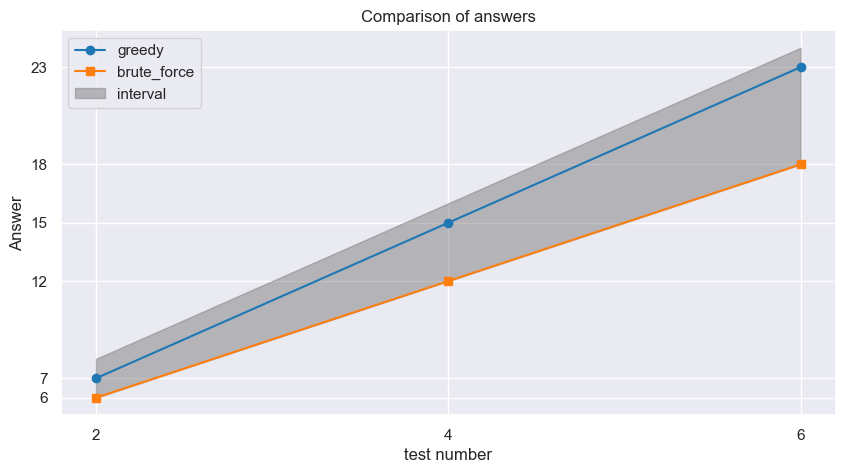

In [9]:
path = "./a.out"

m_values = np.arange(2, 8, 2)

test_inputs = [generate_m_input(m) for m in m_values]

greedy_ans_values = []
greedy_ans_execution_time = []
for test_input in test_inputs:
  ans, execution_time = get_ans_with_time("1\n" + test_input, path)
  greedy_ans_values.append(int(ans))
  greedy_ans_execution_time.append(execution_time)

brute_force_ans_values = []
brute_force_ans_execution_time = []
for test_input in test_inputs:
  ans, execution_time = get_ans_with_time("0\n" + test_input, path)
  brute_force_ans_values.append(int(ans))
  brute_force_ans_execution_time.append(execution_time)

plt.figure(figsize=(10, 5))
plt.plot(m_values, greedy_ans_values, label="greedy", marker="o", color="tab:blue")
plt.plot(m_values, brute_force_ans_values, label="brute_force", marker="s", color="tab:orange")

scaled = np.array(brute_force_ans_values) * (4/3)
plt.fill_between(m_values, brute_force_ans_values, scaled, color="gray", alpha=0.5, label="interval")

plt.title("Comparison of answers")
plt.xlabel("test number")
plt.ylabel("Answer")
plt.xticks(m_values)
plt.yticks(list(set(greedy_ans_values) | set(brute_force_ans_values)))
plt.legend()
plt.show()